In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Data cleaning 

In [3]:
df = pd.read_excel('Hourly_ Generation_Consumption_2050.xlsx')
df.head()

,Sum PJ y,66.77347166664428,68.48712000000002,25.609319999999894,0,121.00598764052332,15.56737522667876,7.529598867795276,10.977304759140573,47.15661919587429,59.09758159081095,-11.94096239493662,-10.630799999999999,221.09524426949116,10.577578459791598,28.000468815543076,21.64383018000009,22.702562855999986,304.01968458082604
0,Sum_Wh_y,18.548187,19.0242,7.1137,0,33.612774,4.324271,2.091555,3.049251,13.099061,16.415995,-3.316934,-2.953,61.415346,2.938216,7.777908,6.012175,6.306267,84.449912
1,Hourly_values_GWh_h,Power_generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El. Demand,NaN,NaN,NaN,NaN,NaN
2,Hours,Run_of_river_power,Storage_power_plants,Pumped_storage,Nuclear_power_plants,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand
3,1,1.764699,1.220507,0,0,0,1.033335,0.27206,0.354668,3.943957,0,3.943957,0,6.510845,0,1.263646,0,0.81483,8.589321
4,2,1.768698,1.220507,0,0,0,0.953386,0.27206,0.354668,3.211019,0,3.211019,0,6.334975,0,1.263646,0,0.18148,7.780101


In [4]:
#Make the third row the header and drop the first three rows
df.columns = df.iloc[2]
df=df.drop([0,1,2])
df.drop(columns=['Nuclear_power_plants','Hours'], axis=1, inplace=True)
df=df.reset_index(drop=True)

In [5]:
df

2,Run_of_river_power,Storage_power_plants,Pumped_storage,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand
0,1.764699,1.220507,0,0,1.033335,0.27206,0.354668,3.943957,0,3.943957,0,6.510845,0,1.263646,0,0.81483,8.589321
1,1.768698,1.220507,0,0,0.953386,0.27206,0.354668,3.211019,0,3.211019,0,6.334975,0,1.263646,0,0.18148,7.780101
2,1.772698,1.220507,0,0,1.033335,0.27206,0.354668,2.790054,0,2.790054,0,6.117137,0,1.263646,0,0.06227,7.443053
3,1.776697,1.231388,0,0,0.941394,0.27206,0.354668,2.587005,0,2.587005,0,5.899298,0,1.263646,0,0,7.162944
4,1.780696,1.220507,0,0,0.892425,0.27206,0.354668,2.371081,0,2.371081,0,5.616507,0,1.263646,0,0.01107,6.891224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.847685,0.050683,0,0,0.857448,0.27206,0.354668,4.148891,0,4.148891,0,7.53009,0,0,0,0.00008,7.53017
8756,1.840686,0.050683,0,0,0.802483,0.27206,0.354668,3.900262,0,3.900262,0,7.169357,0,0,0,0.05031,7.219667
8757,1.832688,0.050683,0,0,0.703547,0.27206,0.354668,3.734383,0,3.734383,0,6.833606,0,0,0,0.11334,6.946946
8758,1.825689,0.050683,0,0,0.624598,0.27206,0.354668,3.967617,0,3.967617,0,6.657736,0,0,0,0.43671,7.094446


In [6]:
#Gather hourly data into daily data
day = {'timestamp': pd.date_range('2050-01-01 00:01:00', periods=8760, freq='H')}
df['Date'] = day['timestamp']
df.set_index('Date', inplace=True)

df

2,Run_of_river_power,Storage_power_plants,Pumped_storage,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand
Date,,,,,,,,,,,,,,,,,
2050-01-01 00:01:00,1.764699,1.220507,0,0,1.033335,0.27206,0.354668,3.943957,0,3.943957,0,6.510845,0,1.263646,0,0.81483,8.589321
2050-01-01 01:01:00,1.768698,1.220507,0,0,0.953386,0.27206,0.354668,3.211019,0,3.211019,0,6.334975,0,1.263646,0,0.18148,7.780101
2050-01-01 02:01:00,1.772698,1.220507,0,0,1.033335,0.27206,0.354668,2.790054,0,2.790054,0,6.117137,0,1.263646,0,0.06227,7.443053
2050-01-01 03:01:00,1.776697,1.231388,0,0,0.941394,0.27206,0.354668,2.587005,0,2.587005,0,5.899298,0,1.263646,0,0,7.162944
2050-01-01 04:01:00,1.780696,1.220507,0,0,0.892425,0.27206,0.354668,2.371081,0,2.371081,0,5.616507,0,1.263646,0,0.01107,6.891224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050-12-31 19:01:00,1.847685,0.050683,0,0,0.857448,0.27206,0.354668,4.148891,0,4.148891,0,7.53009,0,0,0,0.00008,7.53017
2050-12-31 20:01:00,1.840686,0.050683,0,0,0.802483,0.27206,0.354668,3.900262,0,3.900262,0,7.169357,0,0,0,0.05031,7.219667
2050-12-31 21:01:00,1.832688,0.050683,0,0,0.703547,0.27206,0.354668,3.734383,0,3.734383,0,6.833606,0,0,0,0.11334,6.946946


In [7]:
#Group by day
df_day = df.resample('D').sum()
#Group by week
df_week = df.resample('W').sum()
#Group by month 
df_month = df.resample('M').sum()
df_month.index = df_month.index.strftime('%B')
#Group by year
df_year = df.resample('Y').sum()

#Add columns for total generation 
df_day['Total Generation'] = df_day.iloc[:, 0:6].sum(axis=1)
df_month['Total Generation'] = df_month.iloc[:, 0:6].sum(axis=1)
df_year['Total Generation'] = df_year.iloc[:, 0:6].sum(axis=1)

#Convert to TWh
df_day = df_day / 1000
df_month = df_month / 1000
df_year = df_year / 1000

In [8]:
#Convert units from TWh to PJ
df_day_J = df_day * 3.6
df_month_J = df_month * 3.6
df_year_J = df_year * 3.6

In [9]:
#Add a line at the bottom with the total 
df_month_J.loc['Total'] = df_month_J.sum()
df_month_J

2,Run_of_river_power,Storage_power_plants,Pumped_storage,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand,Total Generation
Date,,,,,,,,,,,,,,,,,,
January,4.600314,7.906958,1.128575,3.90795,1.967886,0.728687,1.06457,9.473933,1.762053,7.71188,0.0,20.923088,0.0,2.295599,2.149341,3.649911,29.017939,20.240371
February,2.96922,6.238688,1.665381,5.838225,1.231207,0.658169,0.998955,8.668303,0.580605,8.087698,0.0,20.008634,0.0,1.065412,1.979263,4.635266,27.688576,18.600889
March,3.726193,3.756463,2.094255,11.066104,0.971234,0.726156,1.024047,3.975628,1.912623,2.063005,-0.000093,19.31727,0.002372,2.160827,1.883899,2.063341,25.427709,22.340405
April,4.640584,3.862633,2.079291,11.179194,1.826148,0.691508,0.870961,1.864501,3.644574,-1.780073,-0.215737,17.384083,0.0,2.376603,1.809462,1.800604,23.370752,24.279359
May,7.530028,4.573489,3.267764,15.142324,0.909448,0.564106,0.835227,0.307981,8.86556,-8.557579,-2.070989,17.179028,1.636639,3.121753,1.623,0.705557,24.265977,31.987159
June,7.847062,6.318595,2.137753,14.878607,0.806691,0.494509,0.749141,0.29635,9.244374,-8.948024,-2.943948,17.066045,3.042159,2.10591,1.580283,0.4912,24.285598,32.483216
July,7.241911,7.52123,3.04405,15.77081,0.857886,0.529864,0.755607,0.135294,11.413882,-11.278588,-3.072772,16.804183,2.325681,3.443882,1.580154,0.290418,24.444319,34.965751
August,6.273986,6.990102,3.273909,15.061538,0.558281,0.52529,0.7661,0.139503,9.763236,-9.623733,-2.028044,17.099426,1.3118,3.603523,1.533362,0.27834,23.826451,32.683107
September,5.844162,5.135847,2.880452,11.64158,1.086029,0.564702,0.790931,0.704001,4.741885,-4.037884,-0.299216,17.007926,1.449196,3.236939,1.660603,0.5524,23.907064,27.152773


In [10]:
df_month_J.T

Date,January,February,March,April,May,June,July,August,September,October,November,December,Total
2,,,,,,,,,,,,,
Run_of_river_power,4.600314,2.96922,3.726193,4.640584,7.530028,7.847062,7.241911,6.273986,5.844162,5.691162,5.190344,5.218505,66.773472
Storage_power_plants,7.906958,6.238688,3.756463,3.862633,4.573489,6.318595,7.52123,6.990102,5.135847,6.483254,7.16926,2.5306,68.48712
Pumped_storage,1.128575,1.665381,2.094255,2.079291,3.267764,2.137753,3.04405,3.273909,2.880452,2.065782,0.887797,1.084312,25.60932
PV,3.90795,5.838225,11.066104,11.179194,15.142324,14.878607,15.77081,15.061538,11.64158,8.356859,5.062863,3.099932,121.005988
Wind,1.967886,1.231207,0.971234,1.826148,0.909448,0.806691,0.857886,0.558281,1.086029,1.312975,1.407551,2.63204,15.567375
Biomasse,0.728687,0.658169,0.726156,0.691508,0.564106,0.494509,0.529864,0.52529,0.564702,0.64373,0.705002,0.697876,7.529599
Other,1.06457,0.998955,1.024047,0.870961,0.835227,0.749141,0.755607,0.7661,0.790931,0.963742,1.07321,1.084814,10.977305
Import,9.473933,8.668303,3.975628,1.864501,0.307981,0.29635,0.135294,0.139503,0.704001,3.197554,6.709423,11.684146,47.156619
Export,1.762053,0.580605,1.912623,3.644574,8.86556,9.244374,11.413882,9.763236,4.741885,3.780977,2.985797,0.402015,59.097582


In [11]:
df_month_J['Inflexible_demand_modified']=df_month_J.iloc[:,16]-df_month_J.iloc[:,12]-df_month_J.iloc[:,13] #Inflexible demand is the inflexible demand plus the flexible E mobility and the flexible HP 
df_month_J

2,Run_of_river_power,Storage_power_plants,Pumped_storage,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand,Total Generation,Inflexible_demand_modified
Date,,,,,,,,,,,,,,,,,,,
January,4.600314,7.906958,1.128575,3.90795,1.967886,0.728687,1.06457,9.473933,1.762053,7.71188,0.0,20.923088,0.0,2.295599,2.149341,3.649911,29.017939,20.240371,26.722341
February,2.96922,6.238688,1.665381,5.838225,1.231207,0.658169,0.998955,8.668303,0.580605,8.087698,0.0,20.008634,0.0,1.065412,1.979263,4.635266,27.688576,18.600889,26.623164
March,3.726193,3.756463,2.094255,11.066104,0.971234,0.726156,1.024047,3.975628,1.912623,2.063005,-0.000093,19.31727,0.002372,2.160827,1.883899,2.063341,25.427709,22.340405,23.264509
April,4.640584,3.862633,2.079291,11.179194,1.826148,0.691508,0.870961,1.864501,3.644574,-1.780073,-0.215737,17.384083,0.0,2.376603,1.809462,1.800604,23.370752,24.279359,20.994149
May,7.530028,4.573489,3.267764,15.142324,0.909448,0.564106,0.835227,0.307981,8.86556,-8.557579,-2.070989,17.179028,1.636639,3.121753,1.623,0.705557,24.265977,31.987159,19.507585
June,7.847062,6.318595,2.137753,14.878607,0.806691,0.494509,0.749141,0.29635,9.244374,-8.948024,-2.943948,17.066045,3.042159,2.10591,1.580283,0.4912,24.285598,32.483216,19.137529
July,7.241911,7.52123,3.04405,15.77081,0.857886,0.529864,0.755607,0.135294,11.413882,-11.278588,-3.072772,16.804183,2.325681,3.443882,1.580154,0.290418,24.444319,34.965751,18.674756
August,6.273986,6.990102,3.273909,15.061538,0.558281,0.52529,0.7661,0.139503,9.763236,-9.623733,-2.028044,17.099426,1.3118,3.603523,1.533362,0.27834,23.826451,32.683107,18.911128
September,5.844162,5.135847,2.880452,11.64158,1.086029,0.564702,0.790931,0.704001,4.741885,-4.037884,-0.299216,17.007926,1.449196,3.236939,1.660603,0.5524,23.907064,27.152773,19.22093


## Monthly Demande and Generation

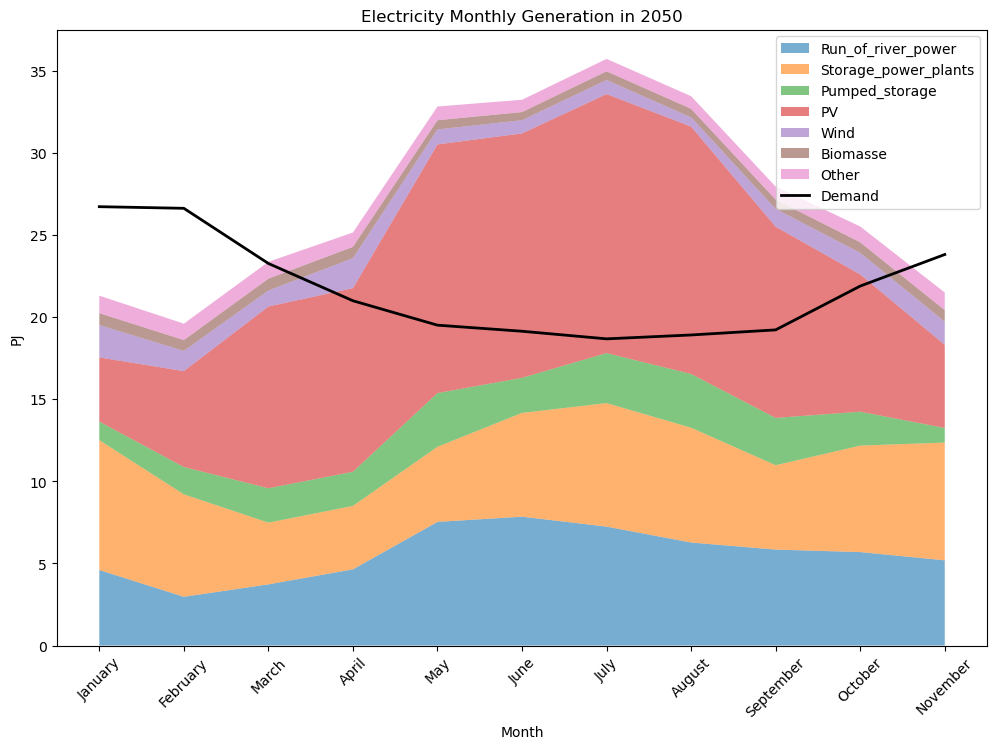

In [12]:
#Plot the monthly data of the generation 
plt.figure(figsize=(12, 8))
y =  np.array(df_month_J.iloc[0:11, 0:7],dtype=float)
plt.stackplot(df_month_J.index[0:11], y.T, labels=df_month_J.columns[0:7], alpha = 0.6)
plt.plot(df_month_J.iloc[0:11, 18], color='black', linewidth=2, label='Demand')
plt.title('Electricity Monthly Generation in 2050')
plt.xlabel('Month')
plt.ylabel('PJ')
plt.xticks(rotation=45)
plt.legend(df_month_J.iloc[0:8])
plt.legend(loc='best')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40')])

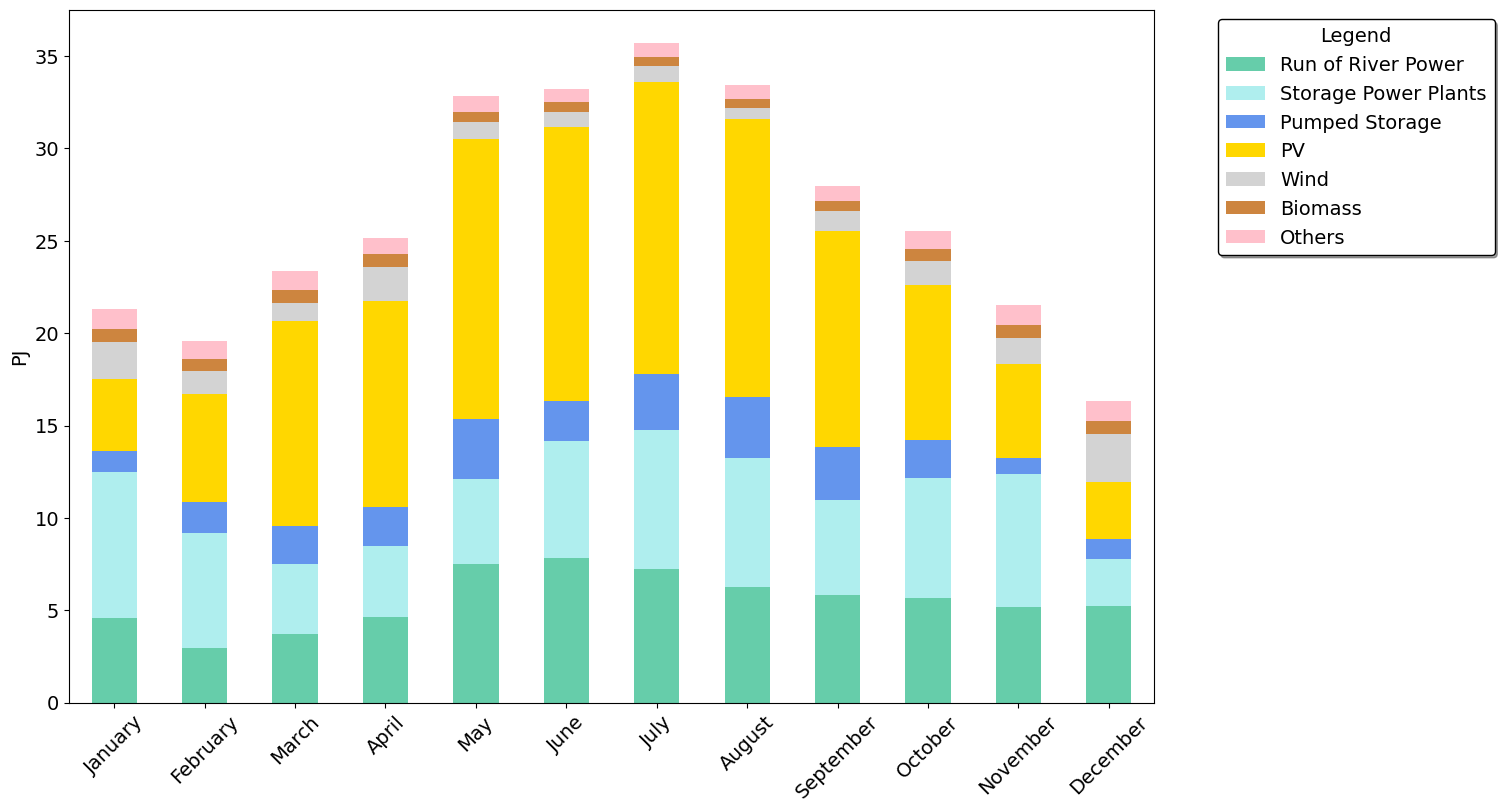

In [13]:
df_month_J.iloc[0:12, 0:7].plot(kind='bar', label =df_month_J.columns[0:7], stacked=True, figsize=(14,9), color = ['mediumaquamarine', 'paleturquoise', 'cornflowerblue', 'gold', 'lightgrey', 'peru', 'pink'])
#plt.plot(df_month_J['Inflexible_demand_modified'], color='black', linewidth=2, label='Demand')
#plt.plot(df_month_J.iloc[0:12, 18], color='red', linewidth=2.5, label='Demand', linestyle='dashed')
plt.ylabel('PJ', fontsize=14)
#plt.title('Monthly electricity Generation in 2050 by source', fontsize=16)
plt.legend(['Run of River Power', 'Storage Power Plants', 'Pumped Storage', 'PV', 'Wind', 'Biomass', 'Others'],loc='best', fontsize=14, title='Legend', title_fontsize='14', shadow=True, fancybox=True, frameon=True, edgecolor='black', facecolor='white', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('')
plt.yticks(fontsize=14)

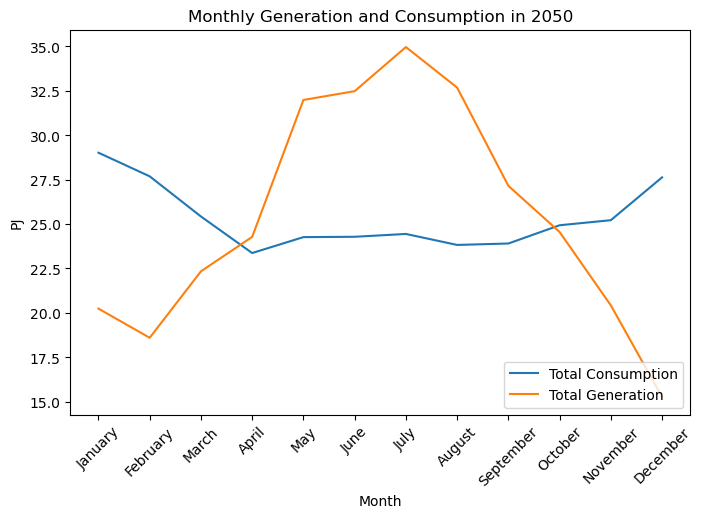

In [14]:
#Plot the monthly data of the generation and consumption
plt.figure(figsize=(8, 5))
#plt.bar(df_month_J.index, df_month_J["Total Generation"], width=20, label='Total Generation', alpha=0.6)
#plt.bar(df_month_J.index, df_month_J["Sum_demand"],  width=20, label='Total Consumption', alpha=0.5)
plt.plot(df_month_J["Sum_demand"][0:12], label='Total Consumption')
plt.plot(df_month_J["Total Generation"][0:12], label='Total Generation')
#plt.plot(df_month_J["Import_balance"], label="Total Import")
#plt.plot(df_month_J["Import_balance"]+df_month_J["Total Generation"], label='Total Generation plus Import')
plt.title('Monthly Generation and Consumption in 2050')
plt.xlabel('Month')
plt.ylabel('PJ')
plt.xticks(rotation=45)
#plt.legend(["Total Generation","Total Consumption","Total Import", "Generation + Import"], loc='lower right')
plt.legend(["Total Consumption","Total Generation"], loc='lower right')



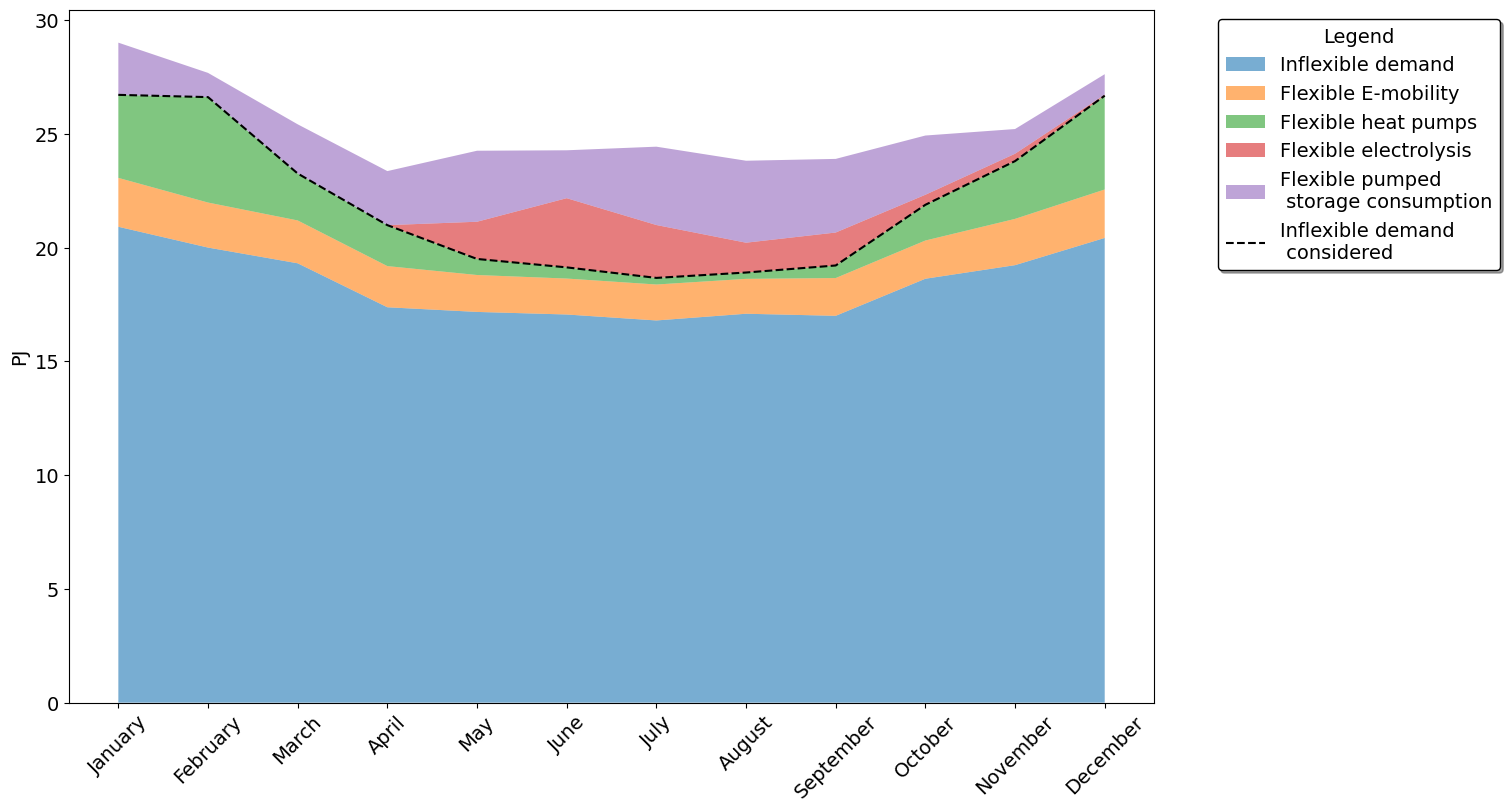

In [15]:
#Stackplot the monthly data of the columns 12 to 17
df_month_J.columns[11:16]
plt.figure(figsize=(14, 9))
y =  np.array([df_month_J['Inflexible_demand '][0:12], df_month_J['Flexible_E_Mobility'][0:12], df_month_J['Flexible_HP'][0:12], df_month_J['Flexible_electrolysis'][0:12], df_month_J['Pumped_storage_consumption'][0:12]],dtype=float)

plt.stackplot(df_month_J.index[0:12], y, alpha = 0.6 )
#plt.plot(df_month_J["Sum_demand"][0:12], label='Total Demand', color='black')
plt.plot(df_month_J["Inflexible_demand_modified"][0:12], label='Inflexible demand considered', color='black', linestyle='dashed')
#plt.title('Monthly Electricity Consumption in 2050')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PJ', fontsize=14)
plt.legend(['Inflexible demand', 'Flexible E-mobility', 'Flexible heat pumps', 'Flexible electrolysis', 'Flexible pumped \n storage consumption', 'Inflexible demand \n considered'],
           title_fontsize='14', shadow=True, fancybox=True, frameon=True, edgecolor='black', facecolor='white', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')

In [16]:
#plot into multiple subplots the different demand categories
def plot_demand_categories():
    fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
    axs[0, 0].plot(df_month_J.iloc[:, 11], color='red')
    axs[0, 0].set_title('Inflixible demand')
    axs[0, 1].plot(df_month_J.iloc[:, 12], color='blue')
    axs[0, 1].set_title('Flexible Electrolysis')
    axs[1, 0].plot(df_month_J.iloc[:, 13], color='green')
    axs[1, 0].set_title('Flexible Pumping storage')
    axs[1, 1].plot(df_month_J.iloc[:, 14], color='orange')
    axs[1, 1].set_title('Flexible E mobility')
    axs[2, 0].plot(df_month_J.iloc[:, 15], color='purple')
    axs[2, 0].set_title('Flexible HP')
    axs[2, 1].plot(df_month_J.iloc[:, 16], color='brown')
    axs[2, 1].set_title('Total Consumption')
    fig.suptitle('Monthly Demand Categories in 2050 in PJ')


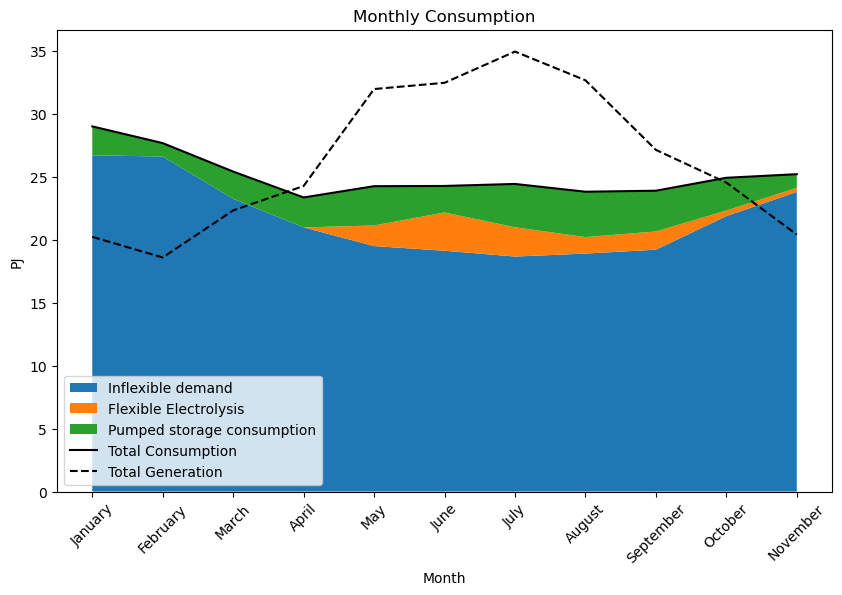

In [18]:


plt.figure(figsize=(10, 6))
y =  np.array([df_month_J['Inflexible_demand_modified'][0:11], df_month_J['Flexible_electrolysis'][0:11], df_month_J['Pumped_storage_consumption'][0:11]],dtype=float)
plt.stackplot(df_month_J.index[0:11], y)#, labels=df_month_J.columns[13:16], alpha = 0.6)
plt.plot(df_month_J["Sum_demand"][0:11], label='Total Consumption', color='black')
plt.plot(df_month_J["Total Generation"][0:11], label='Total Generation', color='black', linestyle='dashed')
plt.title('Monthly Consumption')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('PJ')
plt.legend(["Inflexible demand","Flexible Electrolysis","Pumped storage consumption","Total Consumption","Total Generation"])

## Monthly division by sector

In [19]:
df_prop_sector = pd.DataFrame({"January" : [0.12, 0.42, 0.19, 0.26, 0.01],
                               "February": [0.12, 0.38, 0.20, 0.28, 0.01],
                               "March": [0.21, 0.22, 0.21, 0.35, 0.01],
                               "April": [ 0.24, 0.21, 0.20, 0.34, 0.01],
                                "May": [0.24, 0.20, 0.19, 0.34, 0.01],
                                "June": [0.24, 0.21, 0.20, 0.34, 0.01],
                                "July": [0.24, 0.21, 0.20, 0.33, 0.01],
                                "August": [0.24, 0.21, 0.20, 0.34, 0.01],
                                "September": [0.24, 0.21, 0.20, 0.34, 0.01],
                                "October": [0.17, 0.23, 0.22, 0.36, 0.01],
                                "November": [0.15, 0.24, 0.23, 0.36, 0.01],
                                "December": [0.12, 0.41, 0.26, 0.26, 0.01],
                                "Total": [0.19, 0.28, 0.20, 0.32, 0.01]},
                                index= ['Industry', 'Housing', 'Service', 'Transport', 'Agriculture'])

In [20]:
df_demand_sector = pd.DataFrame(columns= df_prop_sector.columns, index = df_prop_sector.index)

for i in df_month_J.iterrows():
   df_demand_sector[i[0]] = df_prop_sector[i[0]] * i[1]['Inflexible_demand_modified']

df_demand_sector_T = df_demand_sector.T
df_demand_sector_T['Flexible_Electrolysis'] = df_month_J['Flexible_electrolysis']
df_demand_sector_T['Flexible_Pumping_storage'] = df_month_J['Pumped_storage_consumption'] 
df_demand_sector_T['Total_demand_sectors'] = df_demand_sector_T.iloc[:,0:5].sum(axis=1)
df_demand_sector_T['Inflexible_demand'] = df_month_J['Inflexible_demand_modified'] 
df_demand_sector_T['Total_Generation'] = df_month_J['Total Generation']
df_demand_sector_T['Sum_demand'] = df_month_J['Sum_demand']
df_demand_sector_T

,Industry,Housing,Service,Transport,Agriculture,Flexible_Electrolysis,Flexible_Pumping_storage,Total_demand_sectors,Inflexible_demand,Total_Generation,Sum_demand
January,3.206681,11.223383,5.077245,6.947809,0.267223,0.0,2.295599,26.722341,26.722341,20.240371,29.017939
February,3.194780,10.116802,5.324633,7.454486,0.266232,0.0,1.065412,26.356932,26.623164,18.600889,27.688576
March,4.885547,5.118192,4.885547,8.142578,0.232645,0.002372,2.160827,23.264509,23.264509,22.340405,25.427709
April,5.038596,4.408771,4.198830,7.138011,0.209941,0.0,2.376603,20.994149,20.994149,24.279359,23.370752
May,4.681821,3.901517,3.706441,6.632579,0.195076,1.636639,3.121753,19.117434,19.507585,31.987159,24.265977
June,4.593007,4.018881,3.827506,6.506760,0.191375,3.042159,2.10591,19.137529,19.137529,32.483216,24.285598
July,4.481941,3.921699,3.734951,6.162669,0.186748,2.325681,3.443882,18.488008,18.674756,34.965751,24.444319
August,4.538671,3.971337,3.782226,6.429783,0.189111,1.3118,3.603523,18.911128,18.911128,32.683107,23.826451
September,4.613023,4.036395,3.844186,6.535116,0.192209,1.449196,3.236939,19.220930,19.22093,27.152773,23.907064
October,3.721121,5.034458,4.815568,7.880021,0.218889,0.441276,2.604331,21.670057,21.888947,24.553762,24.934554


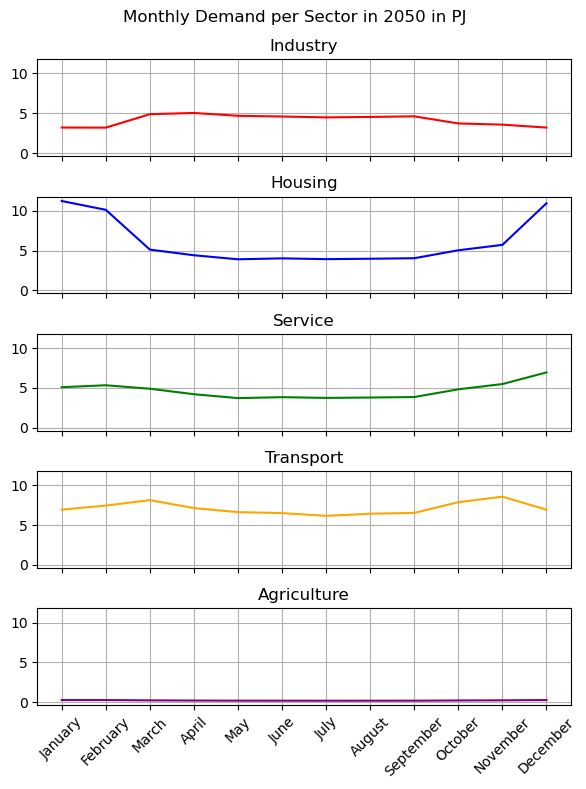

In [21]:
#subplot of the demand per sector
def plot_demand_sector():
    
    fig, axs = plt.subplots(5, 1, figsize=(6, 8), sharex=True, sharey=True)

    axs[0].plot(df_demand_sector.iloc[0,0:12], color='red')
    axs[0].set_title('Industry')
    axs[0].grid()
    axs[1].plot(df_demand_sector.iloc[1,0:12], color='blue')
    axs[1].set_title('Housing')
    axs[1].grid()
    axs[2].plot(df_demand_sector.iloc[2,0:12], color='green')
    axs[2].set_title('Service')
    axs[2].grid()
    axs[3].plot(df_demand_sector.iloc[3,0:12], color='orange')
    axs[3].set_title('Transport')
    axs[3].grid()
    axs[4].plot(df_demand_sector.iloc[4,0:12], color='purple')
    axs[4].set_title('Agriculture')
    axs[4].grid()
    fig.suptitle('Monthly Demand per Sector in 2050 in PJ')
    plt.xticks(rotation=45)

    fig.tight_layout()
plot_demand_sector()

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40')])

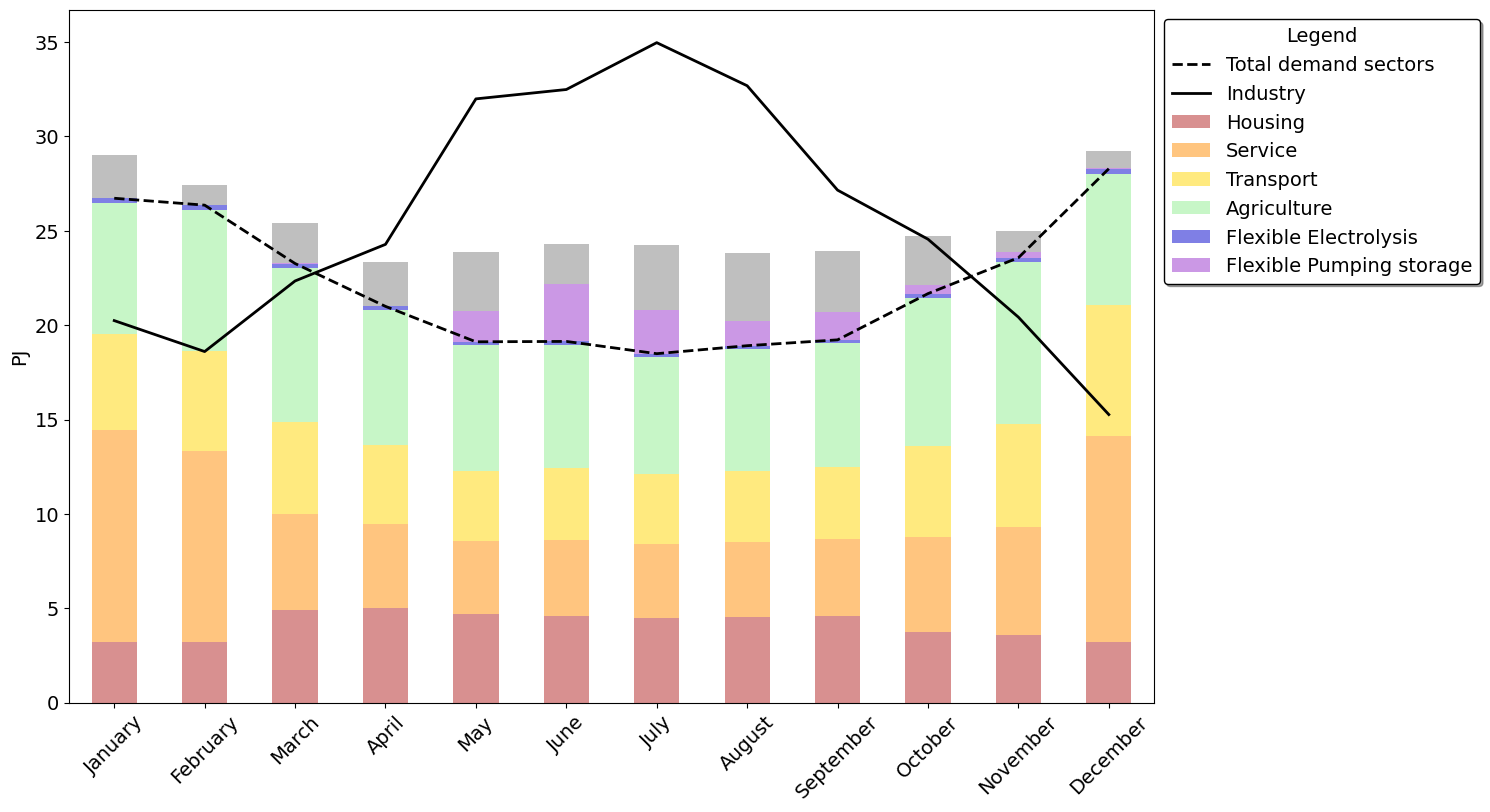

In [22]:

df_demand_sector_T.iloc[0:12,0:7].plot(kind='bar', stacked=True, figsize=(14,9),color=['firebrick', 'darkorange', 'gold', 'lightgreen', 'mediumblue', 'darkorchid','grey'], alpha=0.5)
df_demand_sector_T.iloc[0:12,7].plot(kind='line', label='Inflexible demand', color='black', linewidth=2, linestyle='dashed')
df_demand_sector_T.iloc[0:12,9].plot(kind='line', label='Total Generation', color='black', linewidth=2)
#df_demand_sector_T.iloc[0:12,10].plot(kind='line', label='Total Consumption', color='black', linewidth=2, linestyle ='-.', alpha=0.7)#
#plt.ylim(0, 35)
plt.legend(['Total demand sectors','Industry', 'Housing', 'Service', 'Transport', 'Agriculture', 'Flexible Electrolysis', 'Flexible Pumping storage'],
    loc='upper left', title_fontsize='14', shadow=True, fancybox=True, frameon=True, edgecolor='black', facecolor='white', bbox_to_anchor=(1, 1),  fontsize=14, title='Legend')
#plt.title('Sectoral Monthly Electricity Demand per Sector in 2050', fontsize=16)
plt.ylabel('PJ', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('PJ', fontsize=14)
plt.yticks(fontsize=14)


In [23]:
#Compute potential of energy suffiency per month
df_inf_suff =pd.DataFrame(columns= ['Inflexible Sufficiency'], index = df_month_J.index)
for i in range(0, len(df_month)):

    df_inf_suff.iloc[i] = df_demand_sector_T.Inflexible_demand.iloc[i] - df_demand_sector_T.Total_Generation.iloc[i]
        
#df_inf_suff.reset_index(inplace=True)
#df_inf_suff.rename(columns={'index':'Month'}, inplace=True)
df_inf_suff


,Inflexible Sufficiency
Date,
January,6.48197
February,8.022275
March,0.924104
April,-3.285209
May,-12.479573
June,-13.345687
July,-16.290995
August,-13.771979
September,-7.931843


Text(0, 0.5, 'PJ')

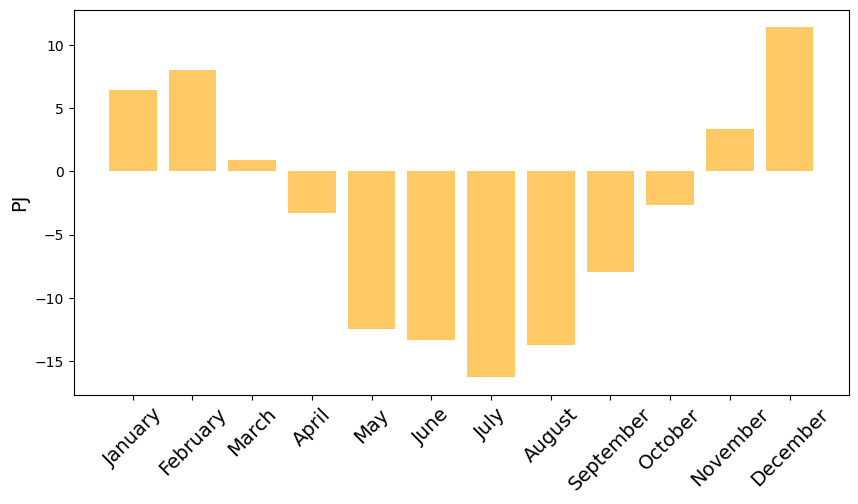

In [24]:
#Plot Sufficiency per 

plt.figure(figsize=(10, 5))
#fig =px.bar(df_inf_suff, x='Month', y=df_inf_suff.iloc[:,1], title='Electricity Sufficiency Required Savings per Month in 2050', labels={'x':'Month', 'y':'PJ'}, height=500, width=800)
fig = plt.bar(df_inf_suff.index, df_inf_suff['Inflexible Sufficiency'], width=0.8, color='orange', alpha=0.6)
#fig.update_xaxes(tickangle=45)  
#plt.title('Electricity Sufficiency Required per Month in 2050', fontsize=16)

plt.xticks(rotation=45, fontsize=14)
plt.ylabel('PJ', fontsize=14)
#export interactive plot to html
#fig.write_html('Electricity_Sufficiency_Required_Savings_per_Month_2050.html')

## Daily division by sector

In [25]:
df_day_J['Inflexible_demand_modified']=df_day_J.iloc[:,17]-df_day_J.iloc[:,13]-df_day_J.iloc[:,14]
#Add a column corresponding to the month in letter
df_day_J['Month'] = df_day_J.index.strftime('%B')
df_month_J.head(12)

2,Run_of_river_power,Storage_power_plants,Pumped_storage,PV,Wind,Biomasse,Other,Import,Export,Import_balance,RE_regulation,Inflexible_demand,Flexible_electrolysis,Pumped_storage_consumption,Flexible_E_Mobility,Flexible_HP,Sum_demand,Total Generation,Inflexible_demand_modified
Date,,,,,,,,,,,,,,,,,,,
January,4.600314,7.906958,1.128575,3.90795,1.967886,0.728687,1.06457,9.473933,1.762053,7.71188,0.0,20.923088,0.0,2.295599,2.149341,3.649911,29.017939,20.240371,26.722341
February,2.96922,6.238688,1.665381,5.838225,1.231207,0.658169,0.998955,8.668303,0.580605,8.087698,0.0,20.008634,0.0,1.065412,1.979263,4.635266,27.688576,18.600889,26.623164
March,3.726193,3.756463,2.094255,11.066104,0.971234,0.726156,1.024047,3.975628,1.912623,2.063005,-0.000093,19.31727,0.002372,2.160827,1.883899,2.063341,25.427709,22.340405,23.264509
April,4.640584,3.862633,2.079291,11.179194,1.826148,0.691508,0.870961,1.864501,3.644574,-1.780073,-0.215737,17.384083,0.0,2.376603,1.809462,1.800604,23.370752,24.279359,20.994149
May,7.530028,4.573489,3.267764,15.142324,0.909448,0.564106,0.835227,0.307981,8.86556,-8.557579,-2.070989,17.179028,1.636639,3.121753,1.623,0.705557,24.265977,31.987159,19.507585
June,7.847062,6.318595,2.137753,14.878607,0.806691,0.494509,0.749141,0.29635,9.244374,-8.948024,-2.943948,17.066045,3.042159,2.10591,1.580283,0.4912,24.285598,32.483216,19.137529
July,7.241911,7.52123,3.04405,15.77081,0.857886,0.529864,0.755607,0.135294,11.413882,-11.278588,-3.072772,16.804183,2.325681,3.443882,1.580154,0.290418,24.444319,34.965751,18.674756
August,6.273986,6.990102,3.273909,15.061538,0.558281,0.52529,0.7661,0.139503,9.763236,-9.623733,-2.028044,17.099426,1.3118,3.603523,1.533362,0.27834,23.826451,32.683107,18.911128
September,5.844162,5.135847,2.880452,11.64158,1.086029,0.564702,0.790931,0.704001,4.741885,-4.037884,-0.299216,17.007926,1.449196,3.236939,1.660603,0.5524,23.907064,27.152773,19.22093


In [26]:
daily_demand_sector = pd.merge(df_prop_sector.T, df_day_J[['Flexible_electrolysis', 'Pumped_storage_consumption', 'Inflexible_demand_modified','Month', 'Total Generation', 'Sum_demand']], right_on='Month', left_index=True, copy=False)
daily_demand_sector.Transport = daily_demand_sector.Transport * daily_demand_sector.Inflexible_demand_modified
daily_demand_sector.Industry = daily_demand_sector.Industry * daily_demand_sector.Inflexible_demand_modified
daily_demand_sector.Service = daily_demand_sector.Service * daily_demand_sector.Inflexible_demand_modified
daily_demand_sector.Residential = daily_demand_sector.Housing * daily_demand_sector.Inflexible_demand_modified
daily_demand_sector


C:\Users\dutheilj\AppData\Local\Temp\1\ipykernel_7996\4098190052.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  daily_demand_sector.Residential = daily_demand_sector.Housing * daily_demand_sector.Inflexible_demand_modified


,Industry,Housing,Service,Transport,Agriculture,Flexible_electrolysis,Pumped_storage_consumption,Inflexible_demand_modified,Month,Total Generation,Sum_demand
Date,,,,,,,,,,,
2050-01-01,0.038698,0.42,0.061271,0.083845,0.01,0.0,0.107835,0.322481,January,0.467979,0.720727
2050-01-02,0.041955,0.42,0.066429,0.090903,0.01,0.0,0.105209,0.349628,January,0.463363,0.765031
2050-01-03,0.047935,0.42,0.075897,0.103859,0.01,0.0,0.105227,0.399457,January,0.541672,0.905379
2050-01-04,0.045915,0.42,0.072699,0.099483,0.01,0.0,0.093037,0.382627,January,0.513615,0.889547
2050-01-05,0.046331,0.42,0.073357,0.100383,0.01,0.0,0.118746,0.38609,January,0.572869,0.98015
...,...,...,...,...,...,...,...,...,...,...,...
2050-12-27,0.046712,0.41,0.101209,0.101209,0.01,0.0,0.0,0.389264,December,0.431575,0.690642
2050-12-28,0.043162,0.41,0.093517,0.093517,0.01,0.0,0.0,0.359683,December,0.424156,0.753437
2050-12-29,0.043066,0.41,0.09331,0.09331,0.01,0.0,0.0,0.358884,December,0.439475,0.824844


Text(0.5, 1.0, 'Daily Demand per Sector in 2050 in PJ')

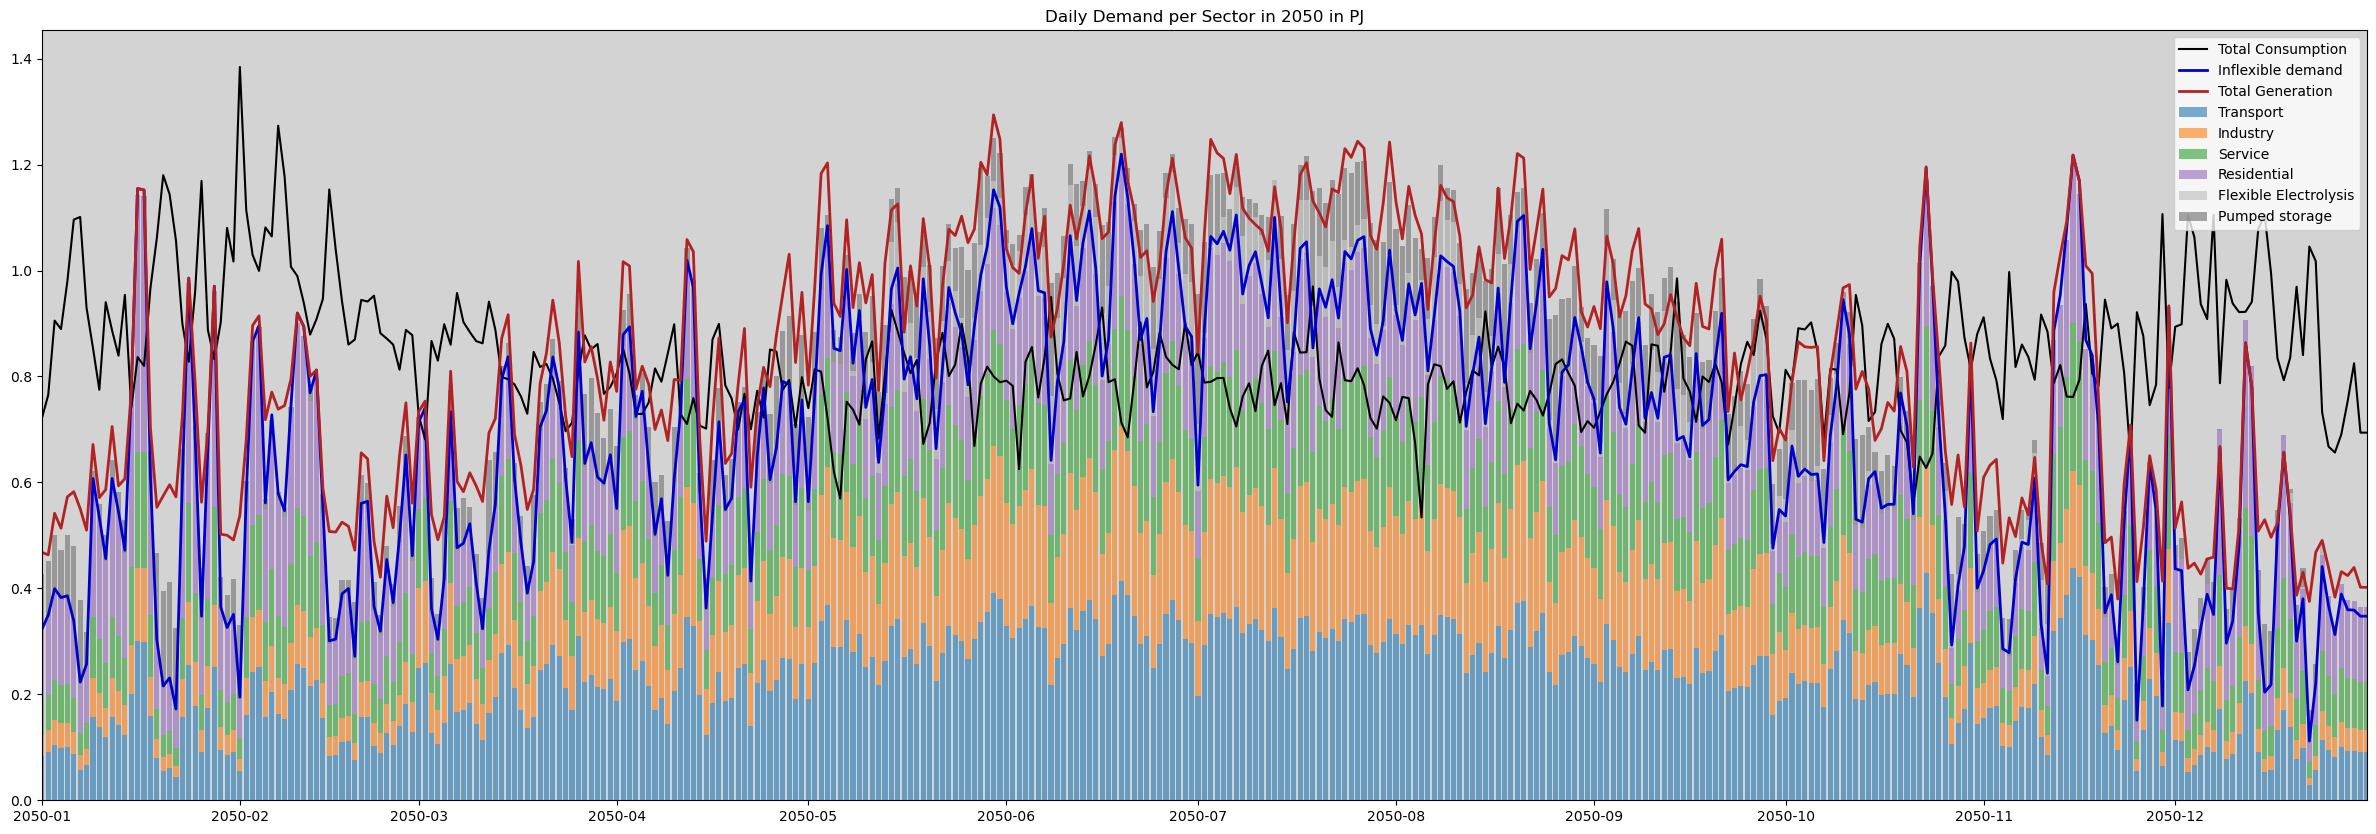

In [27]:
#plot into multiple subplots the different demand categories
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
ax.bar(daily_demand_sector.index, daily_demand_sector.Transport, color='tab:blue', alpha=0.6)
ax.bar(daily_demand_sector.index, daily_demand_sector.Industry, color='tab:orange', bottom=daily_demand_sector.Transport, alpha=0.6)
ax.bar(daily_demand_sector.index, daily_demand_sector.Service, color='tab:green', bottom=daily_demand_sector.Transport+daily_demand_sector.Industry, alpha=0.6)
ax.bar(daily_demand_sector.index, daily_demand_sector.Residential, color='tab:purple', bottom=daily_demand_sector.Transport+daily_demand_sector.Industry+daily_demand_sector.Service, alpha=0.6)
ax.bar(daily_demand_sector.index, daily_demand_sector.Flexible_electrolysis, color='tab:gray', alpha= 0.3, bottom=daily_demand_sector.Transport+daily_demand_sector.Industry+daily_demand_sector.Service+daily_demand_sector.Residential)
ax.bar(daily_demand_sector.index, daily_demand_sector.Pumped_storage_consumption, color='tab:gray', bottom=daily_demand_sector.Transport+daily_demand_sector.Industry+daily_demand_sector.Service+daily_demand_sector.Residential+daily_demand_sector.Flexible_electrolysis, alpha=0.7)
ax.plot(daily_demand_sector['Sum_demand'], color='black')
ax.plot(daily_demand_sector['Inflexible_demand_modified'], color='mediumblue', linewidth=2)
ax.plot(daily_demand_sector['Total Generation'], color='firebrick', linewidth=2)
ax.legend(['Total Consumption','Inflexible demand','Total Generation', 'Transport', 'Industry', 'Service', 'Residential', 'Flexible Electrolysis', 'Pumped storage'])
ax.set_xlim(daily_demand_sector.index[0],daily_demand_sector.index[daily_demand_sector.shape[0]-1])
ax.set_facecolor('lightgrey')
ax.set_title('Daily Demand per Sector in 2050 in PJ')

# Scenario with sufficiency


In [28]:
df_month_J.iloc[0:12, 11]
df_month_J['Inflexible_demand ']

Date
January       20.923088
February      20.008634
March          19.31727
April         17.384083
May           17.179028
June          17.066045
July          16.804183
August        17.099426
September     17.007926
October        18.63817
November      19.235242
December      20.432148
Total        221.095244
Name: Inflexible_demand , dtype: object

In [29]:
df_scenario_suff = pd.read_excel("Scenario Sufficiency.xlsx", index_col=0)
df_scenario_suff.loc["Total Generation"]=df_month_J['Total Generation'].T
df_scenario_suff.iloc[6,12]=df_month_J.iloc[12,17] #Add the total generation over the year
df_scenario_suff.loc["Initial Demand"]=df_month_J['Inflexible_demand_modified'].T #Add the initial total demand over the year
df_scenario_suff.loc['Flexible Electrolysis']=df_month_J['Flexible_electrolysis'].T
df_scenario_suff.loc['Flexible Pumping storage']=df_month_J['Pumped_storage_consumption'].T
df_scenario_suff


,January,February,March,April,May,June,July,August,September,October,November,December,Year 2050
Sectoral demand in PJ,,,,,,,,,,,,,
Industry,3.070000,3.220000,4.930000,5.680000,5.370000,5.250000,5.010000,5.120000,5.190000,4.130000,2.240000,0.920000,50.140000
Residential,4.770000,4.500000,3.120000,4.370000,3.990000,3.940000,3.970000,3.960000,4.050000,5.080000,3.260000,4.700000,49.710000
Service,5.360000,5.480000,4.800000,4.160000,3.800000,3.750000,3.780000,3.770000,3.850000,4.830000,5.500000,5.400000,54.480000
Transport,3.870000,4.190000,5.620000,7.150000,6.710000,6.560000,6.230000,6.390000,6.470000,7.980000,5.470000,3.850000,70.490000
Agriculture,0.250000,0.260000,0.260000,0.230000,0.210000,0.210000,0.210000,0.210000,0.210000,0.270000,0.300000,0.250000,2.850000
Total demand,17.310000,17.650000,18.730000,21.600000,20.080000,19.700000,19.200000,19.460000,19.770000,22.280000,16.770000,15.130000,227.680000
Total Generation,20.240371,18.600889,22.340405,24.279359,31.987159,32.483216,34.965751,32.683107,27.152773,24.553762,20.422817,15.263266,304.972873
Initial Demand,26.722341,26.623164,23.264509,20.994149,19.507585,19.137529,18.674756,18.911128,19.220930,21.888947,23.810051,26.686549,NaN
Flexible Electrolysis,0.000000,0.000000,0.002372,0.000000,1.636639,3.042159,2.325681,1.311800,1.449196,0.441276,0.324062,0.044393,NaN


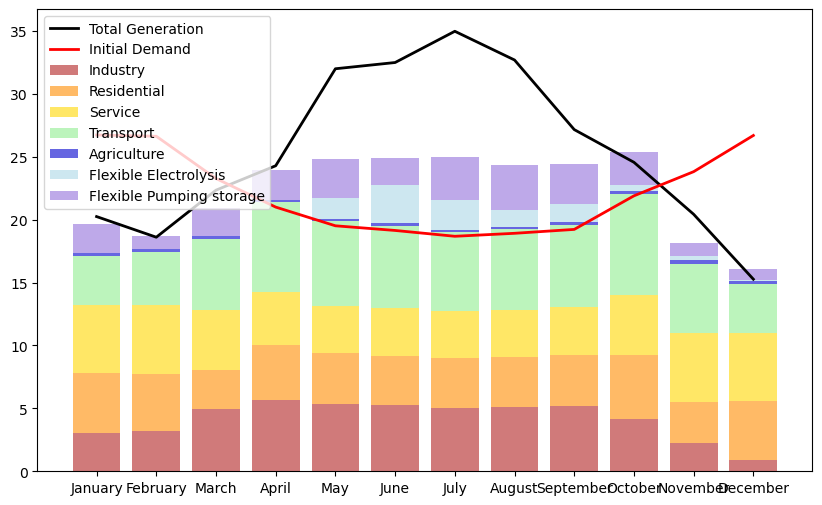

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Industry'][0:12], color='firebrick', alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Residential'][0:12], color='darkorange', bottom=df_scenario_suff.loc['Industry'][0:12], alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Service'][0:12], color='gold',
        bottom=df_scenario_suff.loc['Industry'][0:12]+df_scenario_suff.loc['Residential'][0:12], 
        alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Transport'][0:12], color='lightgreen', 
       bottom=df_scenario_suff.loc['Industry'][0:12]+df_scenario_suff.loc['Residential'][0:12]+df_scenario_suff.loc['Service'][0:12], 
       alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Agriculture'][0:12], color='mediumblue', 
       bottom=df_scenario_suff.loc['Industry'][0:12]+df_scenario_suff.loc['Residential'][0:12]+df_scenario_suff.loc['Service'][0:12]+df_scenario_suff.loc['Transport'][0:12], 
       alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Flexible Electrolysis'][0:12], color='lightblue', 
       bottom=df_scenario_suff.loc['Industry'][0:12]+df_scenario_suff.loc['Residential'][0:12]+df_scenario_suff.loc['Service'][0:12]+df_scenario_suff.loc['Transport'][0:12]+df_scenario_suff.loc['Agriculture'][0:12], 
       alpha=0.6)
ax.bar(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Flexible Pumping storage'][0:12], color='mediumpurple', 
       bottom=df_scenario_suff.loc['Industry'][0:12]+df_scenario_suff.loc['Residential'][0:12]+df_scenario_suff.loc['Service'][0:12]+df_scenario_suff.loc['Transport'][0:12]+df_scenario_suff.loc['Agriculture'][0:12]+df_scenario_suff.loc['Flexible Electrolysis'][0:12], 
       alpha=0.6)
ax.plot(df_scenario_suff.loc['Total Generation'][0:12], color='black', linewidth=2)
ax.plot(df_scenario_suff.loc['Initial Demand'][0:12], color='red', linewidth=2)
ax.legend(['Total Generation','Initial Demand','Industry', 'Residential', 'Service', 'Transport', 'Agriculture', 'Flexible Electrolysis', 'Flexible Pumping storage'])


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35'),
  Text(0, 40.0, '40')])

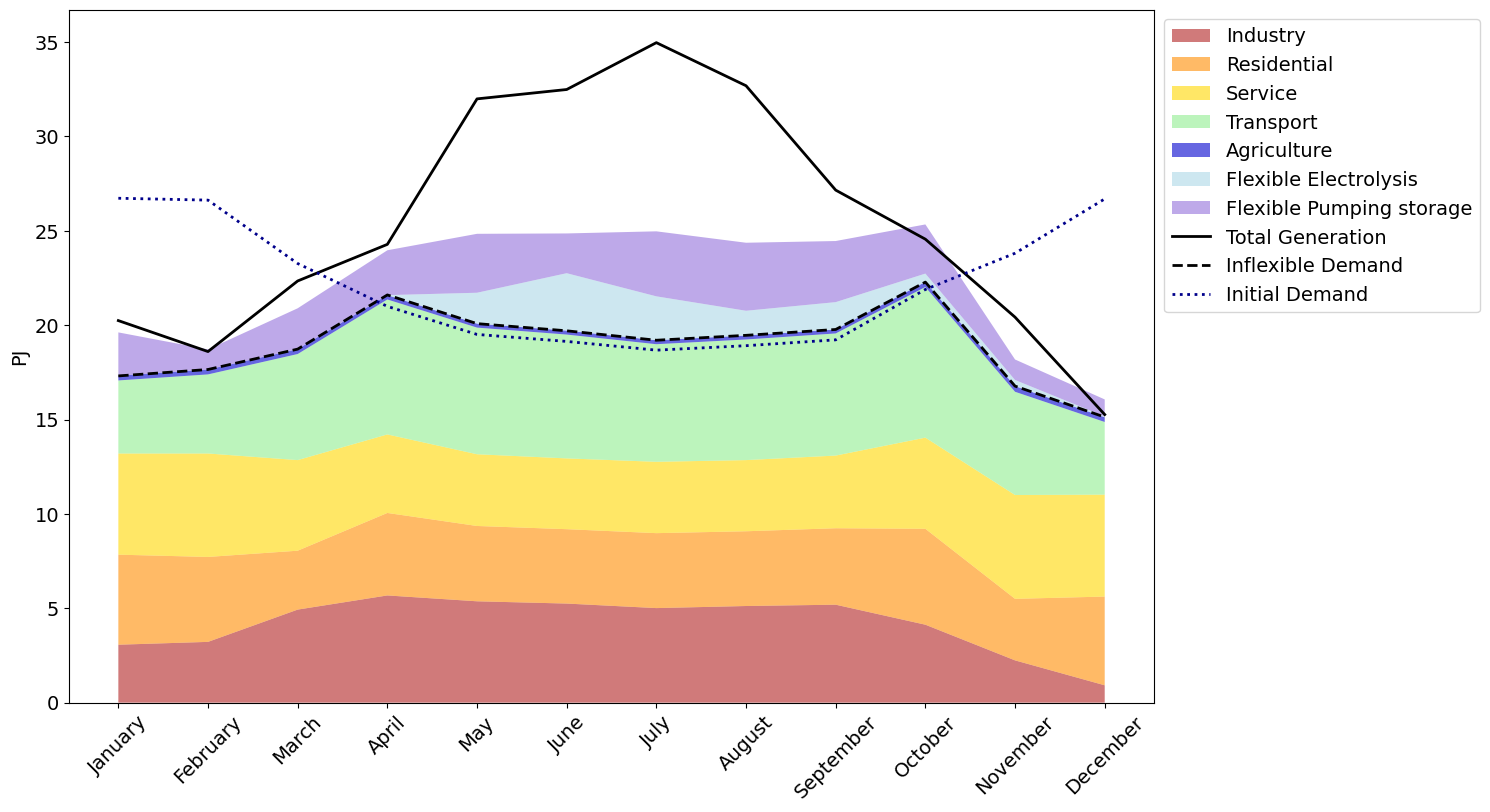

In [36]:
plt.figure(figsize=(14, 9))
plt.stackplot(df_scenario_suff.columns[0:12], df_scenario_suff.loc['Industry'][0:12], df_scenario_suff.loc['Residential'][0:12], df_scenario_suff.loc['Service'][0:12], df_scenario_suff.loc['Transport'][0:12], df_scenario_suff.loc['Agriculture'][0:12], df_scenario_suff.loc['Flexible Electrolysis'][0:12], df_scenario_suff.loc['Flexible Pumping storage'][0:12], colors= ['firebrick', 'darkorange', 'gold', 'lightgreen', 'mediumblue', 'lightblue', 'mediumpurple'], alpha=0.6)
plt.plot(df_scenario_suff.loc['Total Generation'][0:12], color='black', linewidth=2)
plt.plot(df_scenario_suff.loc['Total demand'][0:12], color='black', linestyle= 'dashed', linewidth=2)
plt.plot(df_scenario_suff.loc['Initial Demand'][0:12], color='darkblue', linestyle= ':',linewidth=2)
plt.legend(['Industry', 'Residential', 'Service', 'Transport', 'Agriculture', 'Flexible Electrolysis', 'Flexible Pumping storage','Total Generation','Inflexible Demand', 'Initial Demand'], bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
#plt.title('Electricity Demand in 2050 of the Sufficiency Scenario', fontsize=16)
plt.ylabel('PJ', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#